In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [79]:
class general_plots:
    def __init__(self, nb_rows_col=[1,1]):
        self.nb_rows    = nb_rows_col[0]
        self.nb_col     = nb_rows_col[1]
        self.nb_plot    = self.nb_rows * self.nb_col
        self.count_plot = 0
        #self.fig_name = "Plot"

    def line(self, data, col_list, fig_name="Plot"):

        
        x, y = self.get_components(data, col_list)

        print('n plots = ' + str(self.nb_plot))

        if self.nb_plot == 1:
            fig, ax = plt.subplots(self.nb_rows, self.nb_col, figsize=(5,5))

            ax.set(xlim=(0, 10), ylim=(-2, 2), xlabel='x', ylabel='y(x)',title=fig_name)
            ax.plot(x, y, c='red', linestyle='-', alpha = 0.8, label='sin', linewidth=2)
            ax.grid(linestyle=':', linewidth =1, alpha=0.5)
            ax.hlines(y = 1, xmin = 0, xmax = 4, color='green', linestyle=':', linewidth =3) 
            ax.vlines(x = 1, ymin = 0, ymax = 4, color='pink', linestyle='--', linewidth =3) 
            ax.tick_params(axis="x", labelsize=13)
            ax.tick_params(axis="y", labelsize=13)
            ax.set_xlabel('X', fontsize=18)
            ax.set_ylabel('Y', fontsize=18)
            ax.legend(loc=4, ncol=1, framealpha=0.7, title='legend', markerscale=0.3)
            plt.show()

        else:
            if self.count_plot == self.nb_plot:
                    plt.show()
            print('countplot = ' + str(self.count_plot))
            if self.count_plot == 0:
                self.fig, self.axs = plt.subplots(self.nb_rows, self.nb_col, figsize=(4,4))
                self.count_plot = self.count_plot + 1
            else:
                if self.nb_rows == 1:
                    print(self.count_plot)
                    self.axs[self.count_plot-1].plot(x, y, c='red', linestyle='-', alpha = 0.8, label='sin', linewidth=2)
                    self.count_plot = self.count_plot + 1
                   
                    
                else:
                    print('more rows')
               


    def get_components(self, data, col_list):
        # Dataframe
        if type(data) == pd.core.frame.DataFrame:
            if all(type(elem) == int for elem in col_list) == True:
                x = data.iloc[:,col_list[0]]
                y = data.iloc[:,col_list[1]]
            elif all(type(elem) == str for elem in col_list) == True:
                x = data.loc[:,col_list[0]]
                y = data.loc[:,col_list[1]]
            else:
                print('Error: the column list is not well-specified')
        # Array or list
        elif type(data) == np.ndarray or type(data) == list:
            # List of tuples
            if all(isinstance(item, tuple) for item in data):
                x = [i[col_list[0]] for i in data]
                y = [i[col_list[1]] for i in data]
            else:
                x = data[:,col_list[0]]
                y = data[:,col_list[1]]
        # Tuple
        elif type(data) == tuple:
            x = [i[col_list[0]] for i in data]
            y = [i[col_list[1]] for i in data]
        else:
            sys.exit('The data format is not recognized')
        return x, y

    
    def load_data(self):
        
        return 0

    def save_fig(self):
        print("save")
        return 

### Data

In [80]:
x  = np.linspace(0, 10, 1000)
y1 = np.cos(x)
y2 = np.tan(x)
y3 = np.sin(x)

data = list([x, y1, y2, y3])
data = np.transpose(data)
dd = pd.DataFrame(data, columns=['x', 'cos', 'tan', 'sin'])

### Create object and call methods:

In [81]:
nb_rows_col = (1,2)
c = general_plots(nb_rows_col)


n plots = 2
countplot = 0
n plots = 2
countplot = 1
1


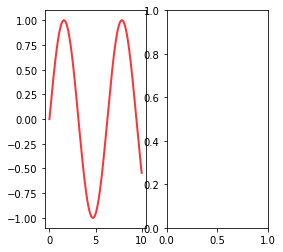

In [82]:
c.line(dd, col_list=['sin','sin'])
c.line(dd, col_list=['x','sin'])

In [12]:
def get_components(data, col_list):
        # Dataframe
        if type(data) == pd.core.frame.DataFrame:
            if all(type(elem) == int for elem in col_list) == True:
                x = data.iloc[:,col_list[0]]
                y = data.iloc[:,col_list[1]]
            elif all(type(elem) == str for elem in col_list) == True:
                x = data.loc[:,col_list[0]]
                y = data.loc[:,col_list[1]]
            else:
                print('Error: the column list is not well-specified')
        # Array or list
        elif type(data) == np.ndarray or type(data) == list:
            # List of tuples
            if all(isinstance(item, tuple) for item in data):
                x = [i[col_list[0]] for i in data]
                y = [i[col_list[1]] for i in data]
            else:
                x = data[:,col_list[0]]
                y = data[:,col_list[1]]
        # Tuple
        elif type(data) == tuple:
            x = [i[col_list[0]] for i in data]
            y = [i[col_list[1]] for i in data]
        else:
            sys.exit('The data format is not recognized')
        return x, y



In [ ]:
def line(self, data, col_list, fig_name="Plot"):

        
        x, y = get_components(data, col_list)

        print('n plots = ' + str(self.nb_plot))

        if self.nb_plot == 1:
            fig, ax = plt.subplots(self.nb_rows, self.nb_col, figsize=(5,5))

            ax.set(xlim=(0, 10), ylim=(-2, 2), xlabel='x', ylabel='y(x)',title=fig_name)
            ax.plot(x, y, c='red', linestyle='-', alpha = 0.8, label='sin', linewidth=2)
            ax.grid(linestyle=':', linewidth =1, alpha=0.5)
            ax.hlines(y = 1, xmin = 0, xmax = 4, color='green', linestyle=':', linewidth =3) 
            ax.vlines(x = 1, ymin = 0, ymax = 4, color='pink', linestyle='--', linewidth =3) 
            ax.tick_params(axis="x", labelsize=13)
            ax.tick_params(axis="y", labelsize=13)
            ax.set_xlabel('X', fontsize=18)
            ax.set_ylabel('Y', fontsize=18)
            ax.legend(loc=4, ncol=1, framealpha=0.7, title='legend', markerscale=0.3)
            plt.show()

        else:
            ax.plt.subplots(self.nb_rows, self.nb_col)

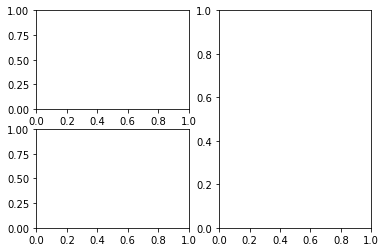

In [78]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])

ax3 = fig.add_subplot(gs[:, 1])

In [75]:
ax